# PREPARAÇÃO/LIMPEZA DE DADOS

In [1]:
### PREARAÇÃO DO AMBIENTE E DOS DADOS

import pandas as pd

lista_clientes = pd.read_csv('caso_estudo_clientes.csv', sep=';')
lista_vendas = pd.read_csv('caso_estudo_vendas.csv', sep=';')
lista_produtos = pd.read_csv('caso_estudo_produtos.csv', sep=';')
lista_pagamentos = pd.read_csv('caso_estudo_pagamentos.csv', sep=';')
lista_lojas = pd.read_csv('caso_estudo_lojas.csv', sep=';')

## BUSCA POR DADOS NULOS/AUSENTES

### SITUAÇÃO 01: ALTERARANDO VALORES NULOS/AUSENTES

- Precisa definir um valor que pode ser rastreado facilmente para substituir

In [2]:
#Verificando se existe e quantos dados nulos existem no dataframe
lista_clientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [3]:
'''
PASSO A PASSO PARA RETORNAR APENAS AS LINHAS QUE TEM VALORES NULOS:

01 - Utiliza o T (transpose) para inverter colunas pelas linhas
'''
lista_clientes.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
id,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
nome,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sexo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dt_nasc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
'''
PASSO A PASSO PARA RETORNAR APENAS AS LINHAS QUE TEM VALORES NULOS:

02 - A função any() retorna apenas uma vez True ou False 
se em alguma coluna da linha específica tiver dado nulo.
'''

lista_clientes.isnull().T.any()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [5]:
'''
PASSO A PASSO PARA RETORNAR APENAS AS LINHAS QUE TEM VALORES NULOS:

03 - Filtrar para que retorne apenas as linhas que possuem pelo
menos 1 valor nulo.
'''
lista_clientes[lista_clientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [6]:
'''
Fazer um teste manual para verificar se existe venda
para um dos clientes da lista anterior. Neste caso, 
foi escolhido o cliente de id 264.
'''
lista_vendas[lista_vendas.id_cliente == 264]

,id,id_cliente,id_loja,id_produto,dt_venda
32,33,264,1,3,22/02/2020
815,816,264,3,3,28/01/2019
906,907,264,6,5,21/02/2019


In [7]:
'''
Resultado anterior indicou que o cliente com dados nulo possui vendas.
Então agora vamos retornar todos os índices da lista de clientes com dados
nulos.
'''
lista_clientes[lista_clientes.isnull().T.any()].index

Index([263, 264, 268, 269, 276, 282, 287, 290, 294, 301], dtype='int64')

In [8]:
'''
Salvar a lista de clientes com dados nulos em uma variável,
para depois que tratar os dados verificar se foram substituídos
'''

indices_clientes_nulos = lista_clientes[lista_clientes.isnull().T.any()].index

In [9]:
'''
Verificar as vendas de todos os clientes que possuem pelo menos 1 
dado nulo. Neste exemplo, verificamos que todos os clientes possuem vendas.
'''

lista_vendas[lista_vendas['id_cliente'].isin(lista_clientes[lista_clientes.isnull().T.any()].index)]

,id,id_cliente,id_loja,id_produto,dt_venda
32,33,264,1,3,22/02/2020
82,83,301,6,4,14/08/2020
197,198,268,2,1,01/03/2018
296,297,301,4,7,13/06/2019
538,539,276,5,4,26/09/2019
597,598,263,8,6,07/07/2018
815,816,264,3,3,28/01/2019
906,907,264,6,5,21/02/2019
917,918,269,7,10,20/09/2018


In [10]:
'''
IMPORTANTE
Neste caso não é possível simplesmente deletar o cliente com dados nulos,
pois todos possuem vendas. 
A primeira possibilidade é alterar os valores por algo rastreado.

A serguir, retornar todos os clientes que o nome seja nulo, retornando
apenas a coluna nome.
'''

#Busca por linhas que possuem nome nulo
lista_clientes.loc[lista_clientes.nome.isnull(),'nome']

263    NaN
264    NaN
268    NaN
269    NaN
Name: nome, dtype: object

In [11]:
'''
Substituindo nome por outro valor rastreável, neste caso, 'Sem Nome'
'''

lista_clientes.loc[lista_clientes.nome.isnull(),'nome'] = 'Sem Nome'

In [12]:
'''
Substituindo sexo por outro valor rastreável, neste caso, o (outro)
'''
lista_clientes.loc[lista_clientes.sexo.isnull(),'sexo'] = 'o'

In [13]:
'''
Substituindo data_nascimento por outro valor
Colocar zeros não funciona pois dificultará cálculos, 
então colocar a data de um bebê é mais recomnedado,
já que uma venda não pode ser realizada para bebês
e ajudará a rastrear futuramente.
'''

lista_clientes.loc[lista_clientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2023'

In [14]:
'''
Retornando os clientes que tinham dados nulos para
verificar se todos foram substituídos
'''
lista_clientes.loc[indices_clientes_nulos,:]

,id,nome,sexo,dt_nasc
263,264,Sem Nome,F,7/29/1997
264,265,Sem Nome,M,2/7/1979
268,269,Sem Nome,F,1/1/2023
269,270,Sem Nome,M,1/1/2023
276,277,Brenda Santos,F,1/1/2023
282,283,Amanda Barros,F,1/1/2023
287,288,Victor Ribeiro,o,12/17/1974
290,291,Clara Pinto,o,12/25/1980
294,295,Tiago Lima,o,7/26/1973
301,302,Guilherme Cardoso,o,3/9/1998


In [15]:
'''
Verificando novamente se ainda
existem dados nulos
'''
lista_clientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

### SITUAÇÃO 02: ALTERAR VALORES

In [16]:
'''
Criando um novo dataset com os dados originais.
'''

lista_clientes_2 = pd.read_csv('caso_estudo_clientes.csv', sep=';')

In [17]:
#Apagar linhas em que todos os elementos sejam nulos
#axis=0 é pelo índice; axis=1 é por coluna

lista_clientes_2.dropna(axis=0, how='all')

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [18]:
#Apagar linhas em que algum elemento seja nulo
lista_clientes_2.dropna(axis=0, how='any')

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [19]:
#Apagar colunas em que todos os elementos sejam nulos
lista_clientes_2.dropna(axis=1, how='all')

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [20]:
#Apagar colunas em que possua algum elemennto nulo
lista_clientes_2.dropna(axis=1, how='any')

,id
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


In [21]:
#Manter somente linhas com pelo menos 3 valores que não sejam nulos (nan):
lista_clientes_2.dropna(thresh=3)

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


# Outliers

- Outliers são valores numéricos atípicos, muito acima ou muito abaixo do conjunto de números;
- Importante: Somente dados numéricos que podem apresentar outliers;
- Antes de toda análise é necessário realizar a busca e, se tiver, tratamento de outliers.

In [22]:
lista_produtos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


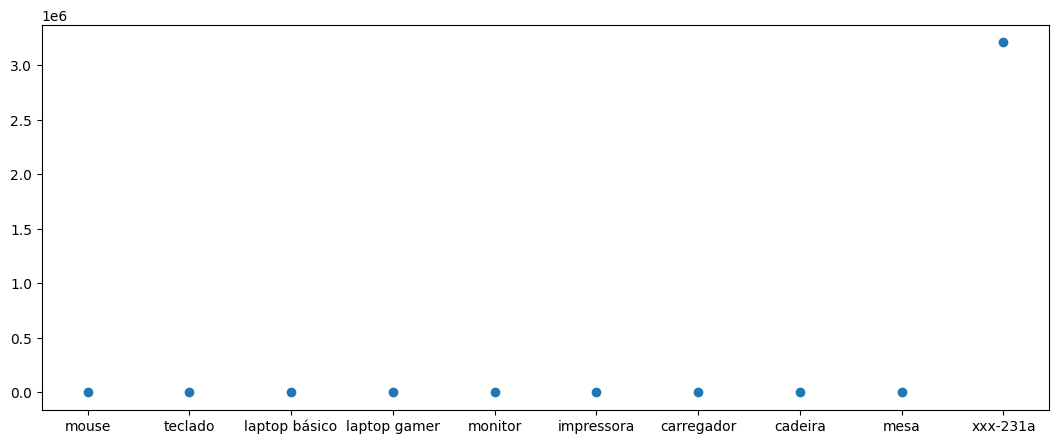

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

x = lista_produtos['produto']
y = lista_produtos['valor']
plt.figure(figsize=(13,5))
plt.scatter(x,y)
plt.show()

<Axes: >

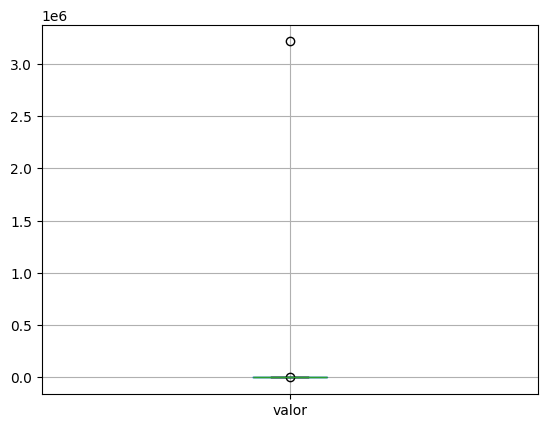

In [37]:
lista_produtos.boxplot(column=['valor'])

In [38]:
lista_produtos[lista_produtos.valor > 3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


<Axes: >

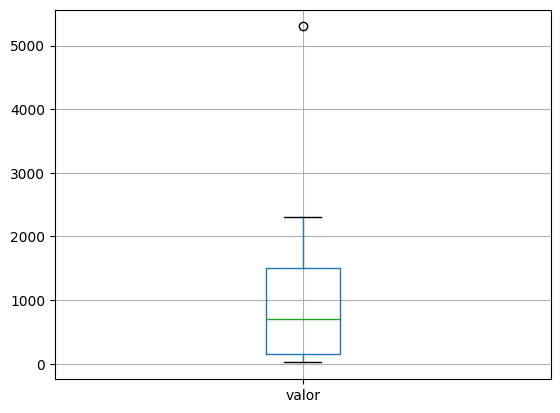

In [39]:
lista_produtos[lista_produtos.valor < 3000000].boxplot(column=['valor'])

In [41]:
lista_produtos[lista_produtos.valor > 5000] 

,id,produto,valor
3,4,laptop gamer,5300.0
9,10,xxx-231a,3211352.0


<Axes: >

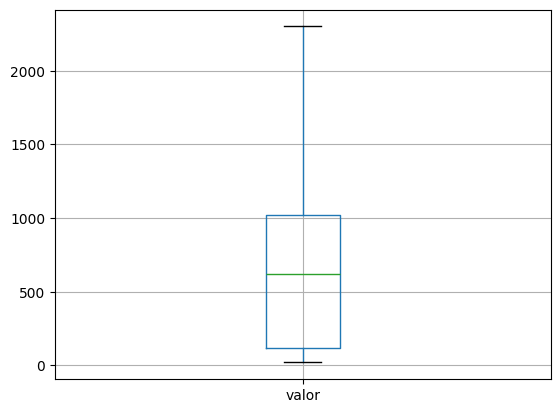

In [42]:
lista_produtos[lista_produtos.valor < 5000].boxplot(column=['valor'])

In [49]:
'''
Supondo que a fonte de dados foi consultada e as informações sobre o produto
estavam erradas. O correto era um celular Samsung que custa R$ 3.500,00.
Os dados serão substituídos
'''

lista_produtos.loc[9,['valor']] = 3500
lista_produtos.loc[9,['produto']] = 'Celular Samsung'
lista_produtos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,Celular Samsung,3500.0


<Axes: >

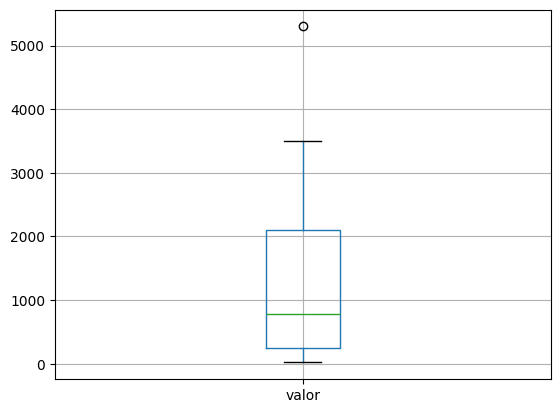

In [50]:
lista_produtos.boxplot(column=['valor'])

In [51]:
# Gerando o dataframe novamente para mostrar a segunda possibilidade de correção
lista_produtos_2 = pd.read_csv('caso_estudo_produtos.csv', sep=';')
lista_produtos_2

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [52]:
'''
Vamos supor que o produto que custa mais de 3 milhões não existe, veio no dataset por um
erro de consulta ao banco de dados. Nesta situação, deve-se apagar o valor.
No exemplo a seguir, foi feito um slicing retirando o elemento e salvando novamente
na mesma variável.
'''
lista_produtos_2 = lista_produtos_2[lista_produtos_2.valor < 3000000]
lista_produtos_2

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
